# Report Analisi Preliminare: Coordinates.csv

### 1. Panoramica del Dataset
* **Nome File:** coordinates.csv
* **Contenuto:** Traiettorie atomiche (posizioni X, Y, Z) della proteina durante la simulazione.
* **Dimensione (Shape):** (50001, 415)
* **Separatore:** Punto e virgola (;).

### 2. Struttura delle Variabili
Il dataset è organizzato in matrice temporale:
* **Colonna 0:** Timestamp (variabile temporale).
* **Colonne 1-414:** Coordinate spaziali.
    * Ogni atomo ha 3 coordinate (x, y, z).
    * Totale atomi: 414 / 3 = 138 atomi.
* **Unità di misura:** Angstrom per lo spazio, Picosecondi (ps) per il tempo.

### 3. Analisi della Simulazione (Tempo)
L'analisi della Colonna 0 conferma i parametri fisici della simulazione di Dinamica Molecolare:
* **Step totali:** 50.000 (più lo stato iniziale t0).
* **Time-step:** 2 femtosecondi.
* **Durata Totale:** 100.000 fs = 100 ps.
* **Monotonicità:** Il tempo scorre linearmente senza interruzioni.

### 4. Analisi Fisica e Traiettoria
L'ispezione visiva della traiettoria del Primo Atomo rivela:
* **Continuità:** Le curve (x, y, z) sono lisce e continue. L'assenza di picchi improvvisi indica che non ci sono errori di scrittura nel file o instabilità numeriche nella simulazione.
* **Drift (Spostamento):** Si osserva uno spostamento netto dell'atomo sull'asse X. Questo è coerente con il moto conformazionale della proteina nel solvente.
* **Range Valori:** Le coordinate rimangono in un range fisicamente plausibile, confermando l'integrità della struttura.

### 5. Conclusioni e Azioni per il Preprocessing
* **Integrità:** Il file non presenta valori nulli (NaN) o corrotti.
* **Formato:** Il separatore e la struttura sono confermati.
* **Azione Richiesta:** La Colonna 0 (Timestamp) deve essere rimossa prima dell'addestramento della rete neurale, poiché il modello deve imparare la dinamica intrinseca e non la correlazione con un indice temporale.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CARICAMENTO ---
# Imposta il percorso corretto del file
file_path = 'coordinates.csv' 

print(f"--- Analisi Approfondita di: {file_path} ---\n")

--- Analisi Approfondita di: coordinates.csv ---



In [2]:
# Sappiamo dal notebook originale che il separatore è ';'
# header=None perché non c'è una riga di intestazione con nomi tipo "Atom1_X"
df = pd.read_csv(file_path, sep=';', header=None, index_col=False)

In [3]:
# --- 2. DIMENSIONI E STRUTTURA ---
print(f"1. SHAPE (Righe, Colonne): {df.shape}")
print(f"   - Ci aspettiamo (50001, 415)")
print(f"   - 50001 sono i timestep (istanti di tempo)")
print(f"   - 415 sono le colonne (1 timestamp + 138 atomi * 3 coordinate)\n")

1. SHAPE (Righe, Colonne): (50001, 415)
   - Ci aspettiamo (50001, 415)
   - 50001 sono i timestep (istanti di tempo)
   - 415 sono le colonne (1 timestamp + 138 atomi * 3 coordinate)



In [4]:
# --- 3. CONTROLLO COLONNA 0 (Timestamp) ---
# Verifichiamo se la colonna 0 è davvero il tempo
print("2. ANALISI TEMPORALE (Colonna 0)")
print(f"   - Primi 5 valori: {df[0].head(5).tolist()}")
print(f"   - Ultimi 5 valori: {df[0].tail(5).tolist()}")
is_monotonic = df[0].is_monotonic_increasing
print(f"   - Il tempo scorre sempre in avanti? {'Sì' if is_monotonic else 'NO (Errore!)'}\n")

2. ANALISI TEMPORALE (Colonna 0)
   - Primi 5 valori: [0.0, 0.002, 0.004, 0.006, 0.008]
   - Ultimi 5 valori: [99.992, 99.994, 99.996, 99.998, 100.0]
   - Il tempo scorre sempre in avanti? Sì



In [5]:
# --- 4. STATISTICHE DEI DATI ---
# Escludiamo la colonna 0 per vedere le statistiche delle coordinate reali
coords_only = df.drop(columns=[0])

In [6]:
print("3. STATISTICHE COORDINATE (Escluso tempo)")
# describe() ci dà media, min, max, deviazione standard
stats = coords_only.describe().T # Transponiamo per leggere meglio
print(stats.iloc[:5]) # Stampiamo solo le prime 5 righe per non intasare lo schermo
print("   ...")

3. STATISTICHE COORDINATE (Escluso tempo)
     count       mean        std      min      25%      50%      75%      max
1  50001.0  44.285494  10.408692  21.3843  35.9984  47.0523  53.8427  56.4038
2  50001.0  40.996532   9.500782  21.1372  32.9698  43.2619  49.8806  52.1530
3  50001.0  41.639721   9.388854  21.1502  34.2439  44.1252  50.2699  52.6880
4  50001.0  44.313515  10.461972  21.3377  35.9799  47.1044  53.9262  56.4140
5  50001.0  40.997573   9.474918  21.1245  33.0501  43.2138  49.8411  52.1867
   ...


In [7]:
print(f"\n   - Valore Minimo assoluto nel dataset: {coords_only.min().min():.4f}")
print(f"   - Valore Massimo assoluto nel dataset: {coords_only.max().max():.4f}")
print("   (Questo ti dice in che 'scatola' spaziale si muove la proteina)\n")


   - Valore Minimo assoluto nel dataset: 20.6903
   - Valore Massimo assoluto nel dataset: 57.0394
   (Questo ti dice in che 'scatola' spaziale si muove la proteina)



In [8]:
# --- 5. CONTROLLO ERRORI (Valori Nulli) ---
nans = df.isnull().sum().sum()
print(f"4. CONTROLLO INTEGRITÀ")
print(f"   - Valori mancanti (NaN): {nans}")
if nans == 0:
    print("   - Il dataset è pulito, non ci sono buchi.")
else:
    print("   - ATTENZIONE: Ci sono buchi nei dati!")

4. CONTROLLO INTEGRITÀ
   - Valori mancanti (NaN): 0
   - Il dataset è pulito, non ci sono buchi.



5. GRAFICO: Movimento del primo atomo (X, Y, Z)


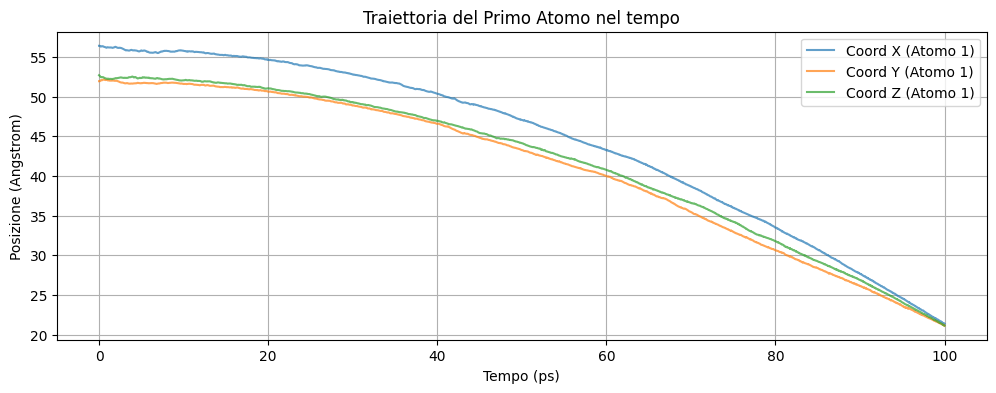

In [9]:
# --- 6. VISUALIZZAZIONE ---
# Grafichiamo il movimento del PRIMO ATOMO (colonne 1, 2, 3 -> X, Y, Z)
# Questo aiuta a capire se la proteina "esplode" o si muove fluidamente
print("\n5. GRAFICO: Movimento del primo atomo (X, Y, Z)")
plt.figure(figsize=(12, 4))
plt.plot(df[0], df[1], label='Coord X (Atomo 1)', alpha=0.7)
plt.plot(df[0], df[2], label='Coord Y (Atomo 1)', alpha=0.7)
plt.plot(df[0], df[3], label='Coord Z (Atomo 1)', alpha=0.7)
plt.title("Traiettoria del Primo Atomo nel tempo")
plt.xlabel("Tempo (ps)")
plt.ylabel("Posizione (Angstrom)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def mostra_anteprima_smart(df, n_righe=5):

    print(f"\n ANTEPRIMA DATASET | Shape: {df.shape}")
    print("-" * 80)
    
    # Se il dataset è molto largo (tipo i tuoi 415 colonne) diamo una visione parziale
    if df.shape[1] > 10:
        import numpy as np
        
        indici_da_vedere = np.r_[0:4, df.shape[1]-3:df.shape[1]]
        
        preview = df.iloc[:n_righe, indici_da_vedere]
        
        print(preview.to_string(index=False))
        
        print(f"\n      ... [ {df.shape[1] - 7} colonne centrali nascoste ] ...")
        print("-" * 80)
    else:
        print(df.head(n_righe))

mostra_anteprima_smart(df)


 ANTEPRIMA DATASET | Shape: (50001, 415)
--------------------------------------------------------------------------------
  0       1       2       3       412     413     414
0.000 56.3980 51.9370 52.6880 56.7550 52.1200 52.4210
0.002 56.3992 51.9368 52.6877 56.7549 52.1190 52.4215
0.004 56.3999 51.9366 52.6871 56.7548 52.1183 52.4222
0.006 56.4001 51.9364 52.6861 56.7547 52.1178 52.4229
0.008 56.4001 51.9362 52.6848 56.7545 52.1174 52.4236

      ... [ 408 colonne centrali nascoste ] ...
--------------------------------------------------------------------------------
